## Introduction to Ensemble Algorithms

Ensemble methods are powerful machine learning techniques that combine predictions from multiple models to improve performance. By leveraging the strengths of multiple algorithms, ensemble methods often achieve better accuracy and generalization compared to individual models.

### Why use ensemble methods?
- **Reduce overfitting**: Combining models reduces the risk of overfitting to the training data.
- **Improve predictions**: The ensemble can outperform the best individual model.
- **Flexibility**: Works with various machine learning algorithms.

### Types of Ensemble Techniques
1. **Bagging (Bootstrap Aggregating)**: Combines predictions of multiple models trained independently.
2. **Boosting**: Builds models sequentially, with each model correcting errors of the previous one.
3. **Stacking**: Combines predictions from multiple base models using a meta-model.


## Bagging with Random Forest

Bagging, or Bootstrap Aggregating, is a technique that trains multiple models on different random subsets of the data. The final prediction is an aggregate of these models (e.g., majority voting for classification or averaging for regression).

### Random Forest
Random Forest is a popular bagging algorithm that builds multiple decision trees and combines their outputs to make robust predictions.


In [46]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9649122807017544


## Boosting with AdaBoost

Boosting focuses on training models sequentially, where each model attempts to correct the errors made by the previous ones. This leads to a strong final model.

### AdaBoost
AdaBoost (Adaptive Boosting) works by combining weak learners (e.g., decision stumps) to create a strong learner.


In [47]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
ada = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')
ada.fit(X_train, y_train)

# Evaluate
y_pred = ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9649122807017544


## Gradient Boosting with XGBoost

Gradient Boosting builds models sequentially, optimizing for errors using gradient descent. XGBoost is a popular implementation known for its speed and accuracy.


In [48]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Evaluate
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.956140350877193


## Stacking

Stacking combines predictions from multiple base models (e.g., Random Forest) using a meta-model that learns to optimize final predictions.


In [49]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME'))
]

# Meta-model
meta_model = LogisticRegression()

# Stacking Classifier
stack = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stack.fit(X_train, y_train)

# Evaluate
y_pred = stack.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9649122807017544


## Comparison of Ensemble Techniques

Below is a comparison of the accuracy achieved by different ensemble methods on the Iris dataset:

- **Random Forest**: High accuracy due to bagging and random feature selection.
- **AdaBoost**: Sequential boosting reduces bias but may overfit on noisy data.
- **XGBoost**: Optimized gradient boosting with regularization for better performance.
- **Stacking**: Combines strengths of multiple algorithms with a meta-model.

Visualizing the performance metrics helps in selecting the best method for specific use cases.


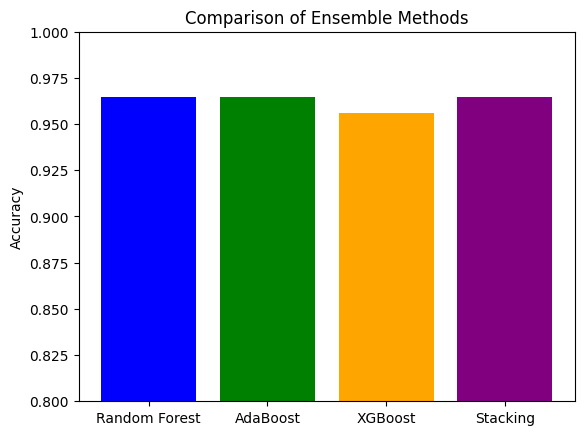

[0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544]


In [50]:
# Accuracy comparison
import matplotlib.pyplot as plt

models = ['Random Forest', 'AdaBoost', 'XGBoost', 'Stacking']
accuracies = [accuracy_score(y_test, rf.predict(X_test)),
              accuracy_score(y_test, ada.predict(X_test)),
              accuracy_score(y_test, xgb.predict(X_test)),
              accuracy_score(y_test, stack.predict(X_test))]

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.ylabel('Accuracy')
plt.title('Comparison of Ensemble Methods')
plt.ylim(0.8, 1.0)
plt.show()

print(accuracies)


# Voting Classifiers

## Introduction to Voting Classifiers

Voting is a powerful ensemble learning method that combines the predictions of multiple base models to make a final decision. It is particularly effective when the base models are diverse and perform well individually, as it leverages the strengths of each model.

## Types of Voting

1. **Hard Voting**  
   In hard voting, the final prediction is made based on the majority vote from the base models. For classification tasks:
   - Each model casts a vote for a class.
   - The class with the most votes is selected as the final prediction.

2. **Soft Voting**  
   In soft voting, the final prediction is made by averaging the predicted probabilities from each base model. It works better when models provide reliable probability estimates.

3. **Weighted Voting**  
   Weighted voting extends soft voting by assigning weights to each base model based on their individual performance or importance. Models with higher accuracy or reliability are given greater influence in the final prediction.  


**Hard Voting**  

In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
log_reg = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')

# Hard Voting Classifier
voting_hard = VotingClassifier(estimators=[
    ('log_reg', log_reg), 
    ('rf', rf), 
    ('ada', ada)], voting='hard')

voting_hard.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import accuracy_score
y_pred = voting_hard.predict(X_test)
print("Accuracy (Hard Voting):", accuracy_score(y_test, y_pred))


Accuracy (Hard Voting): 0.9649122807017544


**Soft Voting**  

In [52]:
# Soft Voting Classifier
voting_soft = VotingClassifier(estimators=[
    ('log_reg', log_reg), 
    ('rf', rf), 
    ('ada', ada)], voting='soft')

voting_soft.fit(X_train, y_train)

# Evaluate
y_pred = voting_soft.predict(X_test)
print("Accuracy (Soft Voting):", accuracy_score(y_test, y_pred))


Accuracy (Soft Voting): 0.9736842105263158


**Weighted Voting**

   **Example**:
   - Suppose three models have prediction accuracies of 80%, 70%, and 60%.
   - Assign weights proportionally, e.g., 4, 3, and 2.
   - The final prediction will reflect the weighted contribution of each model.

In [53]:
# Weighted Voting Classifier
voting_weighted = VotingClassifier(estimators=[
    ('log_reg', log_reg), 
    ('rf', rf), 
    ('ada', ada)], voting='soft', weights=[1, 2, 3]) # Higher weight for AdaBoost

voting_weighted.fit(X_train, y_train)

# Evaluate
y_pred = voting_weighted.predict(X_test)
print("Accuracy (Weighted Voting):", accuracy_score(y_test, y_pred))


Accuracy (Weighted Voting): 0.9736842105263158
